In [1]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df=pd.read_csv('dataset_ml/loan_default_dataset.zip')

In [3]:
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
df.drop(columns='Index')

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


In [5]:
df.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [6]:
print(df.shape)   # total rows, total columns
print(df.columns) # check column names

(10000, 5)
Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')


In [7]:
if "Employed" in df.columns:
    df["Employed"] = df["Employed"].map({"Yes": 1, "No": 0})

In [8]:
x=df.drop(columns=['Defaulted?'])
y=df['Defaulted?']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [11]:
model=Sequential([Dense(64,activation='relu',),
                  Dense(32,activation='relu'),
                  Dense(8,activation='relu'),
                  Dense(1,activation='sigmoid'),
                 ])

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
hist=model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=20,
          batch_size=32,
          verbose=1)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9635 - loss: 0.6652 - val_accuracy: 0.9655 - val_loss: 0.5870
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9680 - loss: 0.5637 - val_accuracy: 0.9655 - val_loss: 0.5018
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9655 - loss: 0.4835 - val_accuracy: 0.9655 - val_loss: 0.4331
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9715 - loss: 0.4143 - val_accuracy: 0.9655 - val_loss: 0.3782
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9671 - loss: 0.3650 - val_accuracy: 0.9655 - val_loss: 0.3339
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9671 - loss: 0.3227 - val_accuracy: 0.9655 - val_loss: 0.2984
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9689 - loss: 0.2864 - val_accuracy: 0.9655 - val_loss: 0.2697
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9662 - loss: 0.2625 - val_accuracy: 0.

In [14]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 96.55%


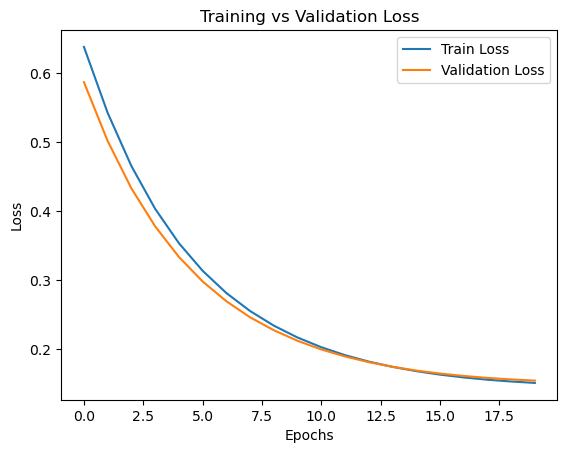

In [32]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label="Train Loss")
plt.plot(hist.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()